## Make Single Day Sampling Maps

This notebook contains an example of making a global map of ODYSEA data with 1 day sampling.

These simplified simulations are part of a much larger ODYSEA simulation capability at JPL, where the actual instrument, sampling, and science performance are generated.

Want to contrubite? Please do! Ask wineteer@jpl.nasa.gov how to get involved.

In [1]:
from odysim.swath_sampling import OdyseaSwath
from odysim.errors import OdyseaErrors
from odysim.colocate_model import GriddedModel, addTimeDim
from odysim.utils import makePlot

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import datetime
import itertools
import xarray as xr

font = {'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)

matplotlib.rc('font', **font)
matplotlib.rc('lines',linewidth=4)
matplotlib.rc('text',usetex=False)

matplotlib.rcParams.update({"axes.grid" : True, "grid.color": "black"})

In [5]:
start_time = datetime.datetime.strptime('2020-01-22:12','%Y-%M-%d:%H')
end_time = datetime.datetime.strptime('2020-01-23:12','%Y-%M-%d:%H')

odysea = OdyseaSwath() 
orbits = odysea.getOrbits(start_time = start_time,end_time = end_time,set_azimuth=False)
model = GriddedModel(preprocess=addTimeDim,n_files=200)


lons = []
lats = []
us = []
u10s = []

for o in orbits:    

    o = model.colocateSwathCurrents(o)
    o = model.colocateSwathWinds(o)
    
    u = np.sqrt(o.u_model.values**2 + o.v_model.values**2)
    u10 = o.wind_speed_model.values
    
    lons = np.append(lons,o.lon)
    lats = np.append(lats,o.lat)
    us = np.append(us,u)
    u10s = np.append(u10s,u10)

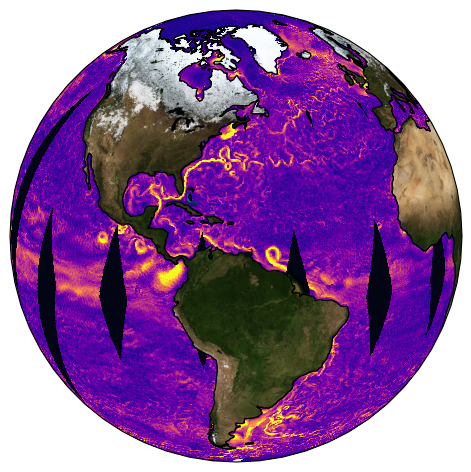

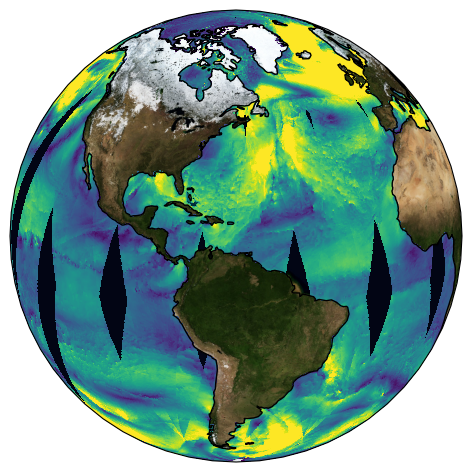

In [7]:
makePlot(lons,lats,us,vmin=0,vmax=1,cblabel='ODYSEA 1-day Surface Current Speed [m/s]',colormap='plasma',figsize=(10,5),bg=True,gridMe=True,globe=True,cb=False)
makePlot(lons,lats,u10s,vmin=0,vmax=15,cblabel='ODYSEA 1-day Wind Speed [m/s]',colormap='viridis',figsize=(10,5),bg=True,gridMe=True,globe=True,cb=False)